In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [5]:
df.drop(['society','price_per_sqft'],axis = 1,inplace = True)

<Axes: ylabel='luxury_score'>

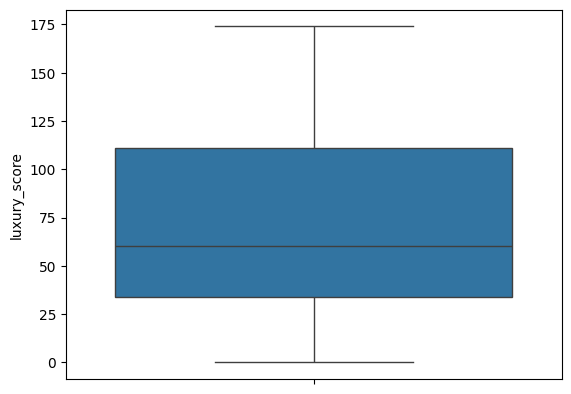

In [6]:
sns.boxplot(df['luxury_score'])

In [7]:
def change_luxury_score(score):
  if score < 50:
    return "Low"
  elif 50 <= score < 150:
    return "Medium"
  elif 150 <= score < 175:
    return "High"
  else:
    return None

df['luxury_score'] =df['luxury_score'].apply(change_luxury_score)

In [8]:
df['luxury_score'].value_counts()

,count
luxury_score,
Low,1594
Medium,1465
High,495


In [9]:
df['floorNum'].describe()

,floorNum
count,3554.000000
mean,6.887451
std,6.062694
min,0.000000
25%,2.000000
50%,5.000000
75%,10.000000
max,51.000000


<Axes: ylabel='floorNum'>

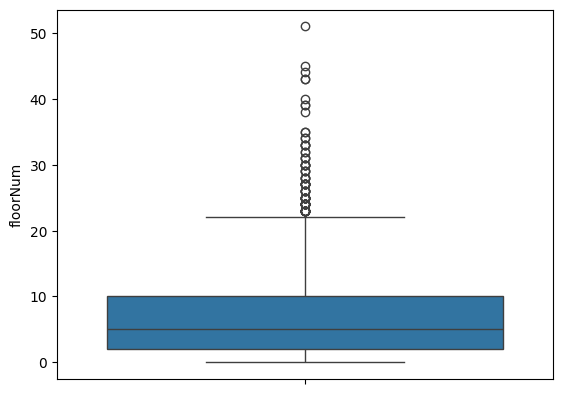

In [10]:
sns.boxplot(df['floorNum'])

In [11]:
def change_flooNum_value(value):
  if 0 < value <= 2:
    return "Low Floor"
  elif 2 < value <= 10:
    return "Mid Floor"
  elif 10 < value <= 51:
    return "High Floor"
  else:
    return None

In [12]:
df['floorNum'] = df['floorNum'].apply(change_flooNum_value)

In [13]:
df['floorNum'].value_counts()

,count
floorNum,
Mid Floor,1797
Low Floor,825
High Floor,804


In [14]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = df.copy()

categorical_cols = df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

Feature selection technique

### correlation analysis

<Axes: >

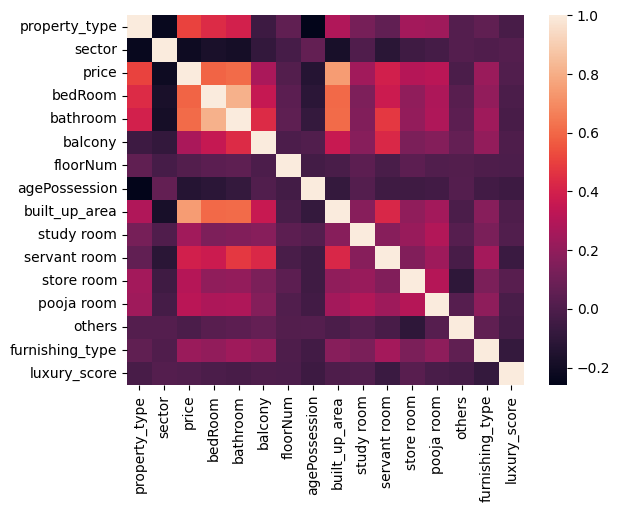

In [17]:
sns.heatmap(data_label_encoded.corr())

In [18]:
data_label_encoded.corr()['price'].sort_values(ascending = False)

,price
price,1.000000
built_up_area,0.748574
bathroom,0.609777
bedRoom,0.591289
property_type,0.503728
servant room,0.391930
pooja room,0.319852
store room,0.305677
balcony,0.269637
study room,0.242955


In [19]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.212084
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,floorNum,0.014275
6,agePossession,-0.134171
7,built_up_area,0.748574
8,study room,0.242955
9,servant room,0.391930


#### random forest feature importance technique

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
7,built_up_area,0.649741
1,sector,0.102309
0,property_type,0.100147
3,bathroom,0.026133
2,bedRoom,0.023914
9,servant room,0.019279
6,agePossession,0.014337
4,balcony,0.012887
13,furnishing_type,0.010528
8,study room,0.008900


#### Gradient boosting feature importance

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
7,built_up_area,0.677929
1,sector,0.102409
0,property_type,0.098161
2,bedRoom,0.038887
3,bathroom,0.036162
9,servant room,0.023222
10,store room,0.010341
6,agePossession,0.004138
8,study room,0.002985
13,furnishing_type,0.002812


#### Permuation importance

In [22]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
7,built_up_area,7.351613e-01
0,property_type,2.007013e-01
1,sector,1.813996e-01
2,bedRoom,2.322980e-02
9,servant room,2.107662e-02
3,bathroom,1.782794e-02
6,agePossession,5.408081e-03
14,luxury_score,2.139795e-03
5,floorNum,1.643246e-03
10,store room,1.207899e-03


Lasso feature selection technique

In [23]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
7,built_up_area,1.510407
0,property_type,0.713606
3,bathroom,0.274782
10,store room,0.199554
8,study room,0.171731
13,furnishing_type,0.164138
9,servant room,0.160617
11,pooja room,0.073953
14,luxury_score,0.055263
2,bedRoom,0.014204


In [24]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
7,built_up_area,0.647693
1,sector,0.103069
0,property_type,0.101999
2,bedRoom,0.025501
3,bathroom,0.025290
9,servant room,0.018477
6,agePossession,0.014328
4,balcony,0.012770
13,furnishing_type,0.011297
8,study room,0.009319


Liner Regression technique

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
7,built_up_area,1.513595
0,property_type,0.711915
3,bathroom,0.280930
10,store room,0.203748
8,study room,0.179589
13,furnishing_type,0.173307
9,servant room,0.169603
11,pooja room,0.077373
14,luxury_score,0.066447
2,bedRoom,0.016974


In [28]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [29]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
sector,-0.212084,0.102309,0.102409,1.813996e-01,-0.069610,0.103069,-0.078600
bedRoom,0.591289,0.023914,0.038887,2.322980e-02,0.014204,0.025501,0.016974
bathroom,0.609777,0.026133,0.036162,1.782794e-02,0.274782,0.025290,0.280930
balcony,0.269637,0.012887,0.001369,-2.939691e-04,-0.043677,0.012770,-0.067003
floorNum,0.014275,0.006571,0.000839,1.643246e-03,-0.000000,0.006663,-0.003300
agePossession,-0.134171,0.014337,0.004138,5.408081e-03,-0.000000,0.014328,-0.001679
built_up_area,0.748574,0.649741,0.677929,7.351613e-01,1.510407,0.647693,1.513595
study room,0.242955,0.008900,0.002985,-1.684459e-02,0.171731,0.009319,0.179589
servant room,0.391930,0.019279,0.023222,2.107662e-02,0.160617,0.018477,0.169603


In [30]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [33]:
final_fi_df.mean(axis = 1).sort_values(ascending=False)

,0
feature,
built_up_area,0.627205
bathroom,0.074150
sector,0.058319
servant room,0.048290
bedRoom,0.044306
store room,0.040477
furnishing_type,0.031309
study room,0.031243
pooja room,0.024077


In [31]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

,0
feature,
built_up_area,0.739662
sector,0.132612
bedRoom,0.030555
bathroom,0.028955
servant room,0.022411
agePossession,0.010523
store room,0.007827
balcony,0.007439
luxury_score,0.004809


In [34]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [35]:
scores.mean()

np.float64(0.819486290105463)

In [36]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [37]:
scores.mean()

np.float64(0.8184142355107555)

In [38]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [39]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [40]:
df = pd.read_csv('/content/gurgaon_properties_post_feature_selection.csv')

In [41]:
df.head()

,property_type,sector,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_score,price
0,0.0,36.0,3.0,2.0,2.0,1.0,1.0,850.0,0.0,0.0,0.0,1.0,0.82
1,0.0,95.0,2.0,2.0,2.0,2.0,1.0,1226.0,1.0,0.0,0.0,1.0,0.95
2,0.0,103.0,2.0,2.0,1.0,0.0,1.0,1000.0,0.0,0.0,0.0,1.0,0.32
3,0.0,99.0,3.0,4.0,4.0,2.0,3.0,1615.0,1.0,0.0,1.0,0.0,1.60
4,0.0,5.0,2.0,2.0,1.0,2.0,3.0,582.0,0.0,1.0,0.0,0.0,0.48


In [42]:
X = df.drop(columns=['price'])
y = df['price']

In [44]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR

In [45]:
columns_to_encode = ['sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_category', 'floor_category']

In [46]:
# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)

In [50]:
# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['property_type', 'bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
        ('cat', OneHotEncoder(drop='first'), ['sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_score', 'floorNum'])
    ],
    remainder='passthrough'
)

In [48]:
# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))
])

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')